In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df_batter = pd.read_csv('../data/hitter_stats_2015.csv')
df_batter = df_batter.dropna()
df_pitcher = pd.read_csv('../data/pitcher_stats_2015.csv')
df_pitcher = df_pitcher.dropna()

In [3]:
NAME_J_TO_E = {
    'Team':'team',
    '選手名':'name',
    '打率':'ave',
    '試合':'on_games',
    '打席数':'pa',
    '打数':'ab',
    '安打':'hit',
    '二塁打':'double',
    '三塁打':'triple',
    '本塁打':'hr',
    '打点':'bp',
    '犠飛':'sac_fly',
    '敬遠':'int_walk',
    '四球':'walk',
    '死球':'deadb',
    '三振':'so',
    '犠打':'bant',
    '併殺打':'db_play',
    '打者':'pa',
    '被安打':'hit',
    '被本塁打':'hr',
    '与死球':'deadb',
    '与四球':'walk',
    '奪三振':'so',
}

In [4]:
df_batter = df_batter.rename(columns=NAME_J_TO_E)
df_pitcher = df_pitcher.rename(columns=NAME_J_TO_E)

In [5]:
batter = df_batter.sample(1)

for cl in batter.columns:
    print('{0} - {1}'.format(cl,batter[cl].values[0]))

team - 楽
背番号 - 55
name - 西田　哲朗
ave - 0.22
on_games - 62.0
pa - 183.0
ab - 168.0
得点 - 19.0
hit - 37.0
double - 7.0
triple - 0.0
hr - 1.0
塁打 - 47.0
bp - 8.0
盗塁 - 2.0
盗塁刺 - 4.0
bant - 4.0
sac_fly - 0.0
walk - 11.0
int_walk - 0.0
deadb - 0.0
so - 44.0
db_play - 4.0
長打率 - 0.28
出塁率 - 0.268


In [6]:
AVG_BATTER = df_batter[['pa','ab','walk','so','hit','double','triple','hr','int_walk','sac_fly','deadb','bant']].sum()
AVG_BATTER['name'] = 'avg_batter'
AVG_BATTER['team'] = None

In [7]:
AVG_PITCHER = df_pitcher.sum()
AVG_PITCHER['name'] = 'avg_pitcher'
AVG_PITCHER['team'] = None

In [8]:
def odds2prob(odds):
    return odds / (1. + odds)

def prob2odds(p):
    return p / (1. - p) 

def calculate_ratio(df,pitcher=False):
    _df = df.copy()
    if pitcher:
        _df['contact'] = df['pa'] - df['walk'] - df['deadb'] - df['so']
    else:
        _df['contact'] = df.pa - (df.walk + df.deadb + df.bant + df.so)
    _df['not_contact'] = _df['pa'] - _df['contact']
    _df['contact_ratio'] = _df['contact'] / _df['pa']
    _df['contact_odds'] = _df['contact_ratio'] / (1-_df['contact_ratio'])

    _df['so_ratio'] = _df['so'] / _df['not_contact']
    _df['so_odds'] = _df['so_ratio'] / (1-_df['so_ratio'])
    
    _df['walk_ratio'] = (_df['walk'] + _df['deadb']) / _df['not_contact']
    _df['walk_odds'] = _df['walk_ratio'] / (1 - _df['walk_ratio'])
    
    _df['hr_ratio'] = _df['hr'] /_df['contact']
    _df['hr_odds'] = prob2odds(_df['hr_ratio'])
    
    _df['on_field'] = _df['contact'] - _df['hr']
     
    _df['hit_ratio'] = _df['hit'] / _df['on_field']
    _df['hit_odds'] = prob2odds(_df['hit_ratio'])
    return _df

In [9]:
def calculate_bat_stats(df):
    _df = df.copy()
    _df['bb'] = _df['walk'] + _df['deadb']
    _df['ab'] = _df['pa'] - _df['walk'] - _df['deadb'] - _df['sac_fly'] - _df['bant']
    _df['AVG'] = _df['hit'] / _df['ab']
    _df['OBP'] = (_df['hit'] + _df['bb']) / (_df['ab'] + _df['bb'] + _df['sac_fly'])
    
#     _df['SLG'] = _df['hit'] + _df['double'] + _df
#     _df['OPS'] = _df['AVG'] + _df['OBP']
    _df['Kp'] = _df['so'] / _df['pa']
    _df['Bp'] = _df['bb'] / _df['pa']
    _df['Waitp'] = _df['Kp'] + _df['Bp']
    
    _df['IsoD'] = _df['OBP'] - _df['AVG']
    return _df

In [10]:
calculate_bat_stats(df_batter)

,team,背番号,name,ave,on_games,pa,ab,得点,hit,double,...,db_play,長打率,出塁率,bb,AVG,OBP,Kp,Bp,Waitp,IsoD
0,広,33,菊池 涼介,0.254,143.0,644.0,562.0,62.0,143.0,20.0,...,7.0,0.343,0.292,31.0,0.254448,0.292437,0.142857,0.048137,0.190994,0.037989
1,広,9,丸 佳浩,0.249,143.0,633.0,530.0,81.0,132.0,28.0,...,4.0,0.413,0.361,95.0,0.249057,0.360890,0.225908,0.150079,0.375987,0.111834
2,広,63,田中 広輔,0.274,141.0,590.0,543.0,61.0,149.0,33.0,...,8.0,0.413,0.325,41.0,0.274401,0.324786,0.177966,0.069492,0.247458,0.050385
3,広,28,新井 貴浩,0.275,125.0,480.0,426.0,52.0,117.0,22.0,...,15.0,0.385,0.348,50.0,0.274648,0.347917,0.152083,0.104167,0.256250,0.073269
4,広,6,梵 英心,0.237,96.0,332.0,283.0,24.0,67.0,15.0,...,6.0,0.360,0.323,37.0,0.236749,0.322981,0.147590,0.111446,0.259036,0.086232
5,広,55,エルドレッド,0.227,79.0,300.0,264.0,32.0,60.0,6.0,...,3.0,0.466,0.307,32.0,0.227273,0.306667,0.303333,0.106667,0.410000,0.079394
6,広,27,會澤 翼,0.246,93.0,290.0,252.0,23.0,62.0,7.0,...,9.0,0.369,0.330,33.0,0.246032,0.329861,0.168966,0.113793,0.282759,0.083829
7,広,57,シアーホルツ,0.250,65.0,248.0,232.0,27.0,58.0,11.0,...,0.0,0.435,0.298,16.0,0.250000,0.298387,0.270161,0.064516,0.334677,0.048387
8,広,51,鈴木 誠也,0.275,97.0,238.0,211.0,21.0,58.0,6.0,...,3.0,0.403,0.329,18.0,0.274882,0.329004,0.159664,0.075630,0.235294,0.054123
9,広,31,石原 慶幸,0.241,83.0,238.0,216.0,15.0,52.0,6.0,...,10.0,0.296,0.287,14.0,0.240741,0.286957,0.176471,0.058824,0.235294,0.046216


In [11]:
df_batter = calculate_ratio(df_batter)
df_pitcher = calculate_ratio(df_pitcher,pitcher=True)

df_batter = calculate_bat_stats(df_batter)

AVG_BATTER = calculate_ratio(AVG_BATTER)
AVG_BATTER = calculate_bat_stats(AVG_BATTER)
AVG_PITCHER = calculate_ratio(AVG_PITCHER,pitcher=True)

In [12]:
AVG_BATTER

pa                    63017
ab                    55605
walk                   5265
so                    11099
hit                   14290
double                 2422
triple                  250
hr                     1214
int_walk                105
sac_fly                 360
deadb                   567
bant                   1220
name             avg_batter
team                   None
contact               44866
not_contact           18151
contact_ratio      0.711967
contact_odds        2.47182
so_ratio           0.611481
so_odds             1.57388
walk_ratio         0.321305
walk_odds          0.473415
hr_ratio          0.0270584
hr_odds           0.0278109
on_field              43652
hit_ratio          0.327362
hit_odds           0.486683
bb                     5832
AVG                0.256991
OBP                0.325615
Kp                 0.176127
Bp                0.0925465
Waitp              0.268674
IsoD              0.0686232
dtype: object

In [13]:
AVG_PITCHER

team                    None
背番号                    11537
name             avg_pitcher
防御率                  1584.56
on_games                6519
勝利                       843
敗北                       843
セーブ                      457
ホールド                    1065
勝率                   109.768
pa                     64910
投球回                  15236.3
hit                    14459
hr                      1217
walk                    5309
deadb                    568
so                     11894
失点                      6452
自責点                     5821
WHIP                   498.6
DIPS                 1415.28
contact                47139
not_contact            17771
contact_ratio       0.726221
contact_odds         2.65258
so_ratio            0.669293
so_odds              2.02382
walk_ratio          0.330707
walk_odds           0.494115
hr_ratio           0.0258173
hr_odds            0.0265015
on_field               45922
hit_ratio            0.31486
hit_odds            0.459556
dtype: object

In [14]:
df_batter[df_batter['name'] == '山田　哲人'].T

,179
team,ヤ
背番号,23
name,山田 哲人
ave,0.329
on_games,143
pa,646
ab,557
得点,119
hit,183
double,39


In [15]:
rdg = np.random.RandomState(71)

def match(batter,pitcher,parkfact=None,avg = AVG_BATTER):
    # contact or not
    contact_odds_ratio = batter['contact_odds'].values[0] * pitcher['contact_odds'].values[0] / avg['contact_odds']
    contact_prob = odds2prob(contact_odds_ratio)
    
    if rdg.uniform() < contact_prob:
        # consider hr
        hr_odds_ratio = batter['hr_odds'].values[0] * pitcher['hr_odds'].values[0] / avg['hr_odds']
        hr_prob = odds2prob(hr_odds_ratio)
        
        if rdg.uniform() < hr_prob:
            return 'hr',0
        
        hit_odds_ratio = batter['hit_odds'].values[0] * pitcher['hit_odds'].values[0] / avg['hit_odds']
        hit_ratio = odds2prob(hit_odds_ratio)
        
        if rdg.uniform() < hit_ratio:
            return 'hit',0
        else:
            return 'f_out',1
        
    else:
        # uncontact
        so_odds_ratio = batter['so_odds'].values[0] * pitcher['so_odds'].values[0] / avg['so_odds']
        so_prob = odds2prob(so_odds_ratio)
        
        if rdg.uniform() < so_prob:
            return 'so',1
        else:
            return 'walk',0

In [23]:
df_pitcher[df_pitcher['on_games'] >= 10].sort_values(by='DIPS').sample(5)

,team,背番号,name,防御率,on_games,勝利,敗北,セーブ,ホールド,勝率,...,contact_odds,so_ratio,so_odds,walk_ratio,walk_odds,hr_ratio,hr_odds,on_field,hit_ratio,hit_odds
101,中,12,田島 慎二,2.28,64.0,4.0,6.0,9.0,16.0,0.400,...,2.397849,0.666667,2.000000,0.333333,0.500000,0.017937,0.018265,219.0,0.310502,0.450331
394,オ,16,平野 佳寿,4.06,33.0,0.0,3.0,12.0,10.0,0.000,...,1.518519,0.722222,2.600000,0.277778,0.384615,0.048780,0.051282,78.0,0.371795,0.591837
349,楽,58,辛島 航,4.58,14.0,5.0,7.0,0.0,0.0,0.417,...,2.905882,0.658824,1.931034,0.341176,0.517857,0.028340,0.029167,240.0,0.308333,0.445783
5,広,19,野村 祐輔,4.64,15.0,5.0,8.0,0.0,0.0,0.385,...,3.987013,0.662338,1.961538,0.337662,0.509804,0.035831,0.037162,296.0,0.371622,0.591398
107,中,64,小熊 凌祐,4.07,13.0,1.0,1.0,0.0,1.0,0.500,...,3.255814,0.558140,1.263158,0.441860,0.791667,0.042857,0.044776,134.0,0.291045,0.410526


In [30]:
# test サファテ vs 中村悠平
bt = df_batter[df_batter['name'] == 'バレンティン']
pt = df_pitcher[df_pitcher['name'] == '野村　祐輔']

df_all_r = pd.DataFrame()
pa = 600
n_iter = 100

for t in range(n_iter):
    df_result = pd.DataFrame()
    results= []
    for i in range(pa):
        result_i,out = match(batter=bt,pitcher=pt,avg=AVG_BATTER)
    #     print result_i,out
        results.append(result_i)

    df_result['result'] = results

    df_result['count'] = 1
    s = df_result.groupby('result').sum()['count']
    s.name = t
    df_all_r = df_all_r.append(s)

In [34]:
bt

,team,背番号,name,ave,on_games,pa,ab,得点,hit,double,...,on_field,hit_ratio,hit_odds,bb,AVG,OBP,Kp,Bp,Waitp,IsoD
195,ヤ,4,バレンティン,0.186,15.0,52.0,43.0,4.0,8.0,2.0,...,28.0,0.285714,0.4,9.0,0.186047,0.326923,0.269231,0.173077,0.442308,0.140877


In [31]:
df_all_r['pa'] = pa

df_all_r['deadb'] = 0
df_all_r['sac_fly'] = 0
df_all_r['bant'] = 0

In [32]:
df_all_r = calculate_ratio(df_all_r)
df_all_r = calculate_bat_stats(df_all_r)

In [33]:
df_all_r.ix[0,:]

f_out            258.000000
hit              123.000000
hr                19.000000
so               119.000000
walk              81.000000
pa               600.000000
deadb              0.000000
sac_fly            0.000000
bant               0.000000
contact          400.000000
not_contact      200.000000
contact_ratio      0.666667
contact_odds       2.000000
so_ratio           0.595000
so_odds            1.469136
walk_ratio         0.405000
walk_odds          0.680672
hr_ratio           0.047500
hr_odds            0.049869
on_field         381.000000
hit_ratio          0.322835
hit_odds           0.476744
bb                81.000000
ab               519.000000
AVG                0.236994
OBP                0.340000
Kp                 0.198333
Bp                 0.135000
Waitp              0.333333
IsoD               0.103006
Name: 0, dtype: float64

(array([  2.,   2.,   7.,  13.,   9.,  24.,  26.,  12.,   2.,   3.]),
 array([ 541. ,  544.3,  547.6,  550.9,  554.2,  557.5,  560.8,  564.1,
         567.4,  570.7,  574. ]),
 <a list of 10 Patch objects>)

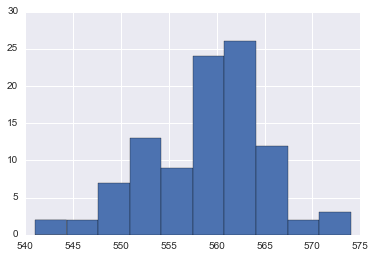

In [163]:
plt.hist(df_all_r['ab'])

(array([  3.,   2.,  12.,  26.,  24.,   9.,  13.,   7.,   2.,   2.]),
 array([ 26. ,  29.3,  32.6,  35.9,  39.2,  42.5,  45.8,  49.1,  52.4,
         55.7,  59. ]),
 <a list of 10 Patch objects>)

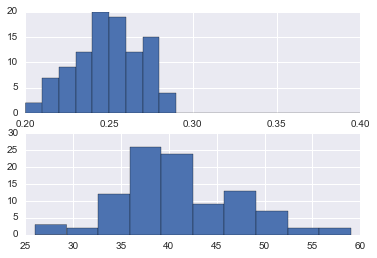

In [164]:
plt.subplot(2,1,1)
plt.hist(df_all_r['AVG'],bins=np.linspace(.2,.4,21))
plt.subplot(2,1,2)
plt.hist(df_all_r['bb'])

In [90]:
df_rg

,0,1,2,3,4,pa,deadb,sac_fly,bant
result,f_out,hit,hr,so,walk,f_outhithrsowalk,0,0,0
count,189,165,19,147,80,f_outhithrsowalk,0,0,0


In [69]:
calculate_ratio(df_rg).T

,count
result,
f_out,169.000000
hit,82.000000
hr,29.000000
so,283.000000
walk,37.000000
pa,600.000000
deadb,0.000000
sac_fly,0.000000
bant,0.000000


In [65]:
pt[['name','pa','so','hit','walk','hr','hit_ratio','hr_ratio']]

,name,pa,so,hit,walk,hr,hit_ratio,hr_ratio
210,サファテ,235.0,102.0,27.0,14.0,4.0,0.236842,0.033898


In [66]:
bt[['name','pa','so','hit','walk','hr','hit_ratio','hr_ratio']]

,name,pa,so,hit,walk,hr,hit_ratio,hr_ratio
179,山田 哲人,646.0,111.0,183.0,81.0,38.0,0.445255,0.084633


In [178]:
pt.columns

Index(['Team', '背番号', 'name', '防御率', '試合', '勝利', '敗北', 'セーブ', 'ホールド', '勝率',
       'pa', '投球回', 'hit', 'hr', 'walk', 'deadb', 'so', '失点', '自責点', 'WHIP',
       'DIPS', 'contact', 'not_contact', 'contact_ratio', 'contact_odds',
       'so_ratio', 'so_odds', 'walk_ratio', 'walk_odds', 'hr_ratio', 'hr_odds',
       'on_field', 'hit_ratio', 'hit_odds'],
      dtype='object')

In [ ]:
def cal_stats(df):
    df['ab'] = df['pa'] - df['']
    df['avg']

In [65]:
class Runners(object):
    def __init__(self):
        self.first = None
        self.second = None
        self.third = None
        
    def 
    
class StartingMembers(object):
    def __init__(self,members):
        self.length = len(members)
        self.members = members
        self.current = 1
        
    def nextbatter(self):
        if self.current == self.length:
            self.current = 1
        else:
            self.current += 1
        return self.members[self.current]
    
    

class GameStatus(object):
    def __init__(self,starting_batters,starting_pitchers):
        self.runners = Runners()
        self.out_count = 0
        self.inning = 1
        self.point = 0
        self.starting_batters = starting_batters
        self.starting_pitchers = starting_pitchers
        self.batting_order = 1
        
    def next_step(self):
        if self.out_count == 3:
            self.inning += 1
            self.out_count = 0
            return
        
        batter = self.starting_batters.nextbatter()
        pitcher = self.starting_pitchers
        
        result = match(batter=batter,pitcher=pitcher)
        

SyntaxError: invalid syntax (<ipython-input-65-4390766a1bb5>, line 7)

In [29]:
df_result = pd.DataFrame()
results= []
for i in range(1000):
    result_i,out = match(batter,pitcher)
#     print result_i,out
    results.append(result_i)
    
df_result['result'] = results

In [43]:
df_result['result'].unique()

array(['field_out', 'hit', 'so', 'walk'], dtype=object)

In [165]:
batter['contact_odds']

153    1.818182
Name: contact_odds, dtype: float64

In [169]:
pitcher['contact_odds'].values[0] * batter['contact_odds'].values[0]

3.662337662337662